In [1]:
#imports
import pyodbc # para trabalhar com o banco de dados
import pandas as pd # para trabalhar com dataframes
import matplotlib.pyplot as plt # para trabalhar com os gráficos

In [2]:
# para conexão com banco de dados
dados_conexao =(
  "Driver={SQL Server};"
  "Server=DESKTOP-76N06IM\\SQLEXPRESS;"
  "Database=ContosoRetailDW;"  
)

conexao= pyodbc.connect(dados_conexao)
print("Conexão bem sucedida")

conexao = pyodbc.connect(dados_conexao)

Conexão bem sucedida


In [4]:
comando_sql = "SELECT ColorName,UnitPrice FROM DimProduct"

dados = pd.read_sql(comando_sql, conexao)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16712\2180237000.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dados = pd.read_sql(comando_sql, conexao)


In [5]:
display(dados)

,ColorName,UnitPrice
0,Silver,12.99
1,Blue,12.99
2,White,14.52
3,Silver,21.57
4,Red,21.57
...,...,...
2512,Red,129.99
2513,White,129.99
2514,White,3.35
2515,Black,3.35


In [22]:
produtos_por_cor = dados.groupby('ColorName').count().reset_index()
produtos_por_cor = produtos_por_cor.rename(columns={'UnitPrice':'Quantidade'})
produtos_por_cor =produtos_por_cor.sort_values(by= 'Quantidade', ascending = False)
produtos_por_cor

,ColorName,Quantidade
1,Black,602
14,White,505
11,Silver,417
6,Grey,283
2,Blue,197
10,Red,99
8,Pink,84
3,Brown,77
5,Green,74
7,Orange,55


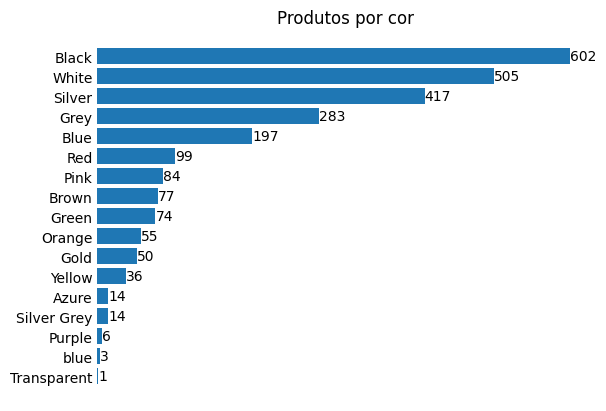

In [38]:
#plt.figure(figsize=(10,8))

barras = plt.barh(produtos_por_cor['ColorName'], produtos_por_cor['Quantidade'])

plt.bar_label(barras,
              labels= produtos_por_cor['Quantidade']
              )

plt.title('Produtos por cor')

plt.tick_params(axis='y', length=0)
plt.xticks([])

plt.gca().invert_yaxis()#ordena da barra maior para menor

plt.box(False)

plt.show()